<h1 style="color:red">Mini projet entrepôt et fouille de données</h1>

@author: Jonathan YUE CHUN<br>
@author: Quentin LEVAVASSEUR<br>
@author: Valentin BOUCHEVREAU

<strong style="color:blue">[1] Données</strong>

TODO: createCSV from result(result format TBD)

In [78]:
import pandas
import numpy

class DataManager:
    
    def __init__(self, data, sheetName):
        xls = pandas.ExcelFile(data)
        self.df = xls.parse(sheetname=sheetName)
    
    def exportTOcsv(self, outputName, header=True):     
        df2 = self.df.fillna("")
        df2.to_csv(outputName+'.csv', encoding='utf-8', index=False, header=header)
        
    def dropColumns(self, columnsIndex):
        self.df = self.df.drop(self.df.columns[columnsIndex], axis=1)
        
    def dropRows(self, rowsIndex):
        self.df = self.df.drop(self.df[self.df.index[rowsIndex]], axis=0)
    
    def replaceColumnValue(self, columnName, regexString):   
        self.df[columnName] = self.df[columnName].str.replace(regexString, '')
        
    def columnToNumeric(self, columnName):
        self.df[columnName] = pandas.to_numeric(self.df[columnName], errors='coerce').fillna(0).astype(numpy.int64)
    
    def addColumn(self, columnName, columnValues):
        #columnValues is a list [...] containing a certain amount number of values intended to be inserted in the given column 
        self.df[columnName] = columnValues
        
    def getDataframe(self):
        df2 = self.df.fillna("")
        return df2

<strong style="color:blue">Extraction des feuilles xlsx et l'exporter en CSV (+Nettoyage)</strong>

<ul>
  <li>Pour les données de test, suppression des colonnes de prédictions (5 colonnes...).</li>
</ul>



In [79]:
dataManager1 = DataManager("Alphaprise.xlsx", "apprentissage")
dataManager1.replaceColumnValue("PrevisionnelAnnuel", "[^0-9.e+]")
dataManager1.columnToNumeric("PrevisionnelAnnuel")
dataManager1.columnToNumeric("NbSalaries")
#add a row example
#dataManager1.addColumn("coltest", list(range(1, (dataManager1.getDataframe().shape[0] + 1))))
dataManager1.exportTOcsv("apprentissage", header=False)

dataManager2 = DataManager("Alphaprise.xlsx", "test")
dataManager2.dropColumns([34,35,36,37,38])
dataManager2.exportTOcsv("test", header=False)

<strong style="color:blue">[2] Travail demandé</strong><br><br>
<strong>Analyse statistique</strong>

In [80]:
learningData = dataManager1.getDataframe()
testData = dataManager2.getDataframe()

averagePrevisionnelAnnuel = learningData['PrevisionnelAnnuel'].mean()
averageCapaciteEmprunt = learningData['CapaciteEmprunt'].mean()
averageNbSalaries = learningData['NbSalaries'].mean()
print("averagePrevisionnelAnnuel: " + str(averagePrevisionnelAnnuel) + "\t" + "averageCapaciteEmprunt: " + str(averageCapaciteEmprunt) + "\t" + "averageNbSalaries: " + str(averageNbSalaries) + "\n")

for i in range(1,31):
    temp = learningData["P"+str(i)].mean()
    print("P" + str(i) + " average: " + str(temp)+ "\n")


averagePrevisionnelAnnuel: 84088.18952100986	averageCapaciteEmprunt: 13985.954676638437	averageNbSalaries: 4.2472765000864605

P1 average: 6531.958552654355

P2 average: 1982.9198556112765

P3 average: 3843.604731108426

P4 average: 2458.2636460314684

P5 average: 2179.842723499917

P6 average: 2752.253797337018

P7 average: 698.4204616980809

P8 average: 640.177281687707

P9 average: 354.4432413971984

P10 average: 0.0

P11 average: 377.00858983226664

P12 average: 2772.456076430926

P13 average: 1930.4653544872945

P14 average: 2169.552788345147

P15 average: 109.95279180356226

P16 average: 2458.947484004836

P17 average: 0.26366159432820335

P18 average: 131.64165312121824

P19 average: 476.7135457375043

P20 average: 6786.025033719506

P21 average: 1563.0109216669537

P22 average: 1936.6075168597606

P23 average: 608.1426724883278

P24 average: 354.13560781601046

P25 average: 31.277587757219436

P26 average: 296.9638734220981

P27 average: 17.859086114473467

P28 average: 281.289

<p><strong style="color:red">Conclusion sur l'analyse de la moyenne sur les colonnes numériques</strong></p>
<ul>
    <li>On peut éliminer les deux colonnes <strong>P10</strong> et <strong>P17</strong> (car valeur très inférieurs aux autres colonnes P) pour les futures analyses;</li>
    <li>Les colonnes <strong>P1, P3, P20</strong> se distincte. En effet, ces colonnes là possèdent des valeurs très au-dessus de tous les autres P;</li>
    <li>Des colonnes P restants, on distincte deux groupes, notamment <strong>(P2, P4, P5, P6, P12, P13, P14, P16, P21, P22)</strong> et <strong>(P7, P8, P9, P11, P15, P18, P19, P23, P24, P25, P26, P27, P28, P29, P30)</strong></li>
    <li>Pour la moyenne sur la colonne NbSalaries, il est nécessaire de le faire en plusieurs groupes différents. C'est-à-dire: une pour les entreprises à taille humaine (entre 4 - 20 employés), une pour les PME (entre 21 à 100 employés) et une pour les grande entreprises (100+ employés)</li>
<ul>

<strong>Faire émerger des secteurs d'activité à partir des données(le nombre de secteurs d'activité identifié par la direction des ventes est de 8 secteurs, en comptant les Particuliers et les Divers, mais ce chiffre n'est en aucun cas une valeur parfaite). <br>
    <p style="color:blue">Variables à exclure</p>au moins Secteur1, Secteur2, SecteurParticulier, SecteurDivers</strong>
    
D'après le raisonnement réalisé précédemment, on exclura également <strong>P10</strong> et <strong>P17</strong>

In [81]:
#Suppression des colonnes par rapport à l'index de la colonne (à exécuter une seule fois, sinon refaire l'importation des données)
dataManager1.dropColumns([1,2,3,4, 20, 27])

<strong style="color:red">Hypothèse 1</strong><br>
<strong>Eclatement de la donnée source en prenant compte l'hypothèse énoncé plus haut sur la colonne NbSalaries, c'est-à-dire qu'on cherchera à regrouper les différents catégories de clients ensembles...
Dans la suite, on cherchera à faire la même chose en considérant que les colonnes P{1..30}</strong>
<ul>
    <li>données des entreprises où le nombre de salariés est inférieur à 6</li>
    <li>données des entreprises (PME): 21 à 100 employés</li>
    <li>données des entreprises de tailles importantes</li>
</ul>

In [82]:
smallCompanyData = dataManager1.getDataframe().loc[dataManager1.getDataframe()['NbSalaries'] < 6]
mediumCompanyData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] > 6) & (dataManager1.getDataframe()['NbSalaries'] < 100)]
bigCompanyData = dataManager1.getDataframe().loc[dataManager1.getDataframe()['NbSalaries'] > 100]

averageSmallCompanyData = smallCompanyData['NbSalaries'].mean()
averageMediumCompanyData = mediumCompanyData['NbSalaries'].mean()
averageBigCompanyData = bigCompanyData['NbSalaries'].mean()

print("Moyennes du nombres de salariés")
print("Petite entreprise/client individuel: " + str(int(averageSmallCompanyData)))
print("PME: " + str(int(averageMediumCompanyData)))
print("Grande entreprise: " + str(int(averageBigCompanyData)))
print("")
print("Petite entreprise/client individuel:")
for i in range(1,31):
    if i != 10 and i != 17:
        temp = smallCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")
        
print("PME: ")        
for i in range(1,31):
    if i != 10 and i != 17:
        temp = mediumCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")

print("Grande entreprise: ")
for i in range(1,31):
    if i != 10 and i != 17:
        temp = bigCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")

Moyennes du nombres de salariés
Petite entreprise/client individuel: 1
PME: 17
Grande entreprise: 386

Petite entreprise/client individuel:
PME: 
Grande entreprise: 


<strong>Visualisation des données statistiques...</strong>

Text(0,0.5,'NbEntreprises')

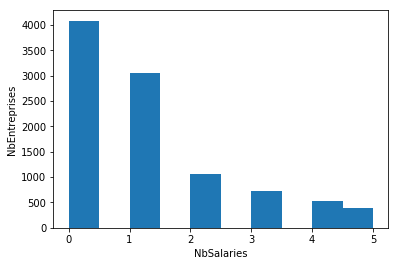

In [83]:
%matplotlib inline

hist1 = smallCompanyData['NbSalaries'].plot(kind='hist')
hist1.set_xlabel("NbSalaries")
hist1.set_ylabel("NbEntreprises")

Text(0,0.5,'NbEntreprises')

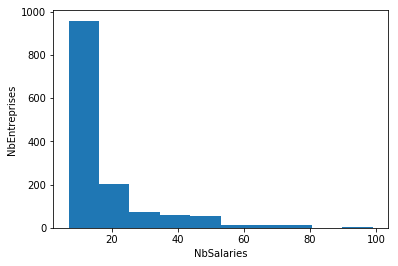

In [84]:
hist2 = mediumCompanyData['NbSalaries'].plot(x='_id', y='total', kind='hist')
hist2.set_xlabel("NbSalaries")
hist2.set_ylabel("NbEntreprises")

Text(0,0.5,'NbEntreprises')

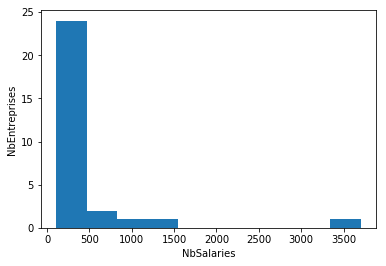

In [85]:
hist3 = bigCompanyData['NbSalaries'].plot(x='_id', y='total', kind='hist')
hist3.set_xlabel("NbSalaries")
hist3.set_ylabel("NbEntreprises")

Les trois histogrammes construits suggèrent qu'ils existent 7 catégories (secteurs d'activités) de clients (en se basant sur le nombres de salariés dans les entreprises):
<ul>
    <li>les particuliers (0 ou 1 personnes);</li>
    <li>divers (2 à 5 personnes);</li>
    <li>les start-ups (5 à 10 personnes);</li>
    <li>les PME (11 à 200 personnes);</li>
    <li>les grandes entreprises (300 à 1500 personnes);</li>
    <li>et les entreprises de taille internationales (plus de 3000 personnes).</li>
</ul>
De ce fait, il est logique de procéder les analyses statistiques en regroupants les clients venant du même secteur d'activité.

Pour ce faire, nous allons procéder par réutiliser le code préalablement définit pour faire apparaître ces différents groupes...

In [86]:
normalCustomersData = dataManager1.getDataframe().loc[dataManager1.getDataframe()['NbSalaries'] <= 1]

othersData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 2) & (dataManager1.getDataframe()['NbSalaries'] <= 5)]

startUpData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 5) & (dataManager1.getDataframe()['NbSalaries'] <= 10)]

PMEData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 11) & (dataManager1.getDataframe()['NbSalaries'] <= 200)]

localEnterpriseData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 300) & (dataManager1.getDataframe()['NbSalaries'] <= 1500)]

internationalEnterpriseData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 3000)]

<strong>Analyses statistiques sur les particuliers:</strong>

In [87]:
print("Moyenne du salaire pour les particuliers:")
print(str(normalCustomersData['CapaciteEmprunt'].mean())+"\n")
# utiliser ddof = 0 en arguements pour la variance biasé
print("La variance sur chaque colonne du tableau (NON BIASE):")
print(normalCustomersData.var())
print("\n")
print("L'écart-type sur chaque colonne du tableau (NON BIASE):")
print(normalCustomersData.std())

Moyenne du salaire pour les particuliers:
9516.330968601058

La variance sur chaque colonne du tableau (NON BIASE):
CapaciteEmprunt       3.225326e+08
PrevisionnelAnnuel    1.153498e+08
NbSalaries            2.447824e-01
P1                    5.774548e+08
P2                    2.426808e+07
P3                    1.492900e+08
P4                    9.529090e+07
P5                    1.808758e+08
P6                    4.490461e+07
P7                    2.370901e+06
P8                    4.781930e+06
P9                    2.104135e+06
P11                   3.853632e+05
P12                   1.664259e+08
P13                   6.340617e+07
P14                   1.497539e+07
P15                   4.263507e+06
P16                   1.121376e+08
P18                   4.440553e+05
P19                   1.603332e+06
P20                   7.465829e+08
P21                   4.007559e+07
P22                   3.780173e+08
P23                   1.444075e+07
P24                   6.293626e+05
P25      

<strong style="color:red">Hypothèse 2</strong>
<p>Toujours sur l'analyse de base statistique, contrairement à <strong>l'hypothèse 1</strong>, on cherchera à faire apparaître des groupes d'invidus en se concentrant sur les variables <strong>P{1..30}. Les variables P{1..30} représentent le chiffre d'affaire réalisé sur une période de 30 ans pour chaque clients. Chaque variable P représente une famille de produits vendus...</strong></p>
Dans les analyses précédentes, deux colonnes ont été supprimées car une moyenne entre 0 et 1. Pour la suite du raisonnement, on supprimera les mêmes colonnes, à savoir <strong>P10</strong> et <strong>P17</strong>.


In [88]:
data = dataManager1.getDataframe()

# Cherchons le nombre de lignes qui vaut 0 pour chaque variables P
print("Pourcentage et nombres de lignes valants 0 pour chaque variables P...")
p_results = []
for p in range(1, 31):
    if (p != 10 and p != 17):
        numOfClients = data.loc[data["P" + str(p)] == 0].count()
        print("P" + str(p) + ": " + str(numOfClients["P" + str(p)]) + "\t" + " soit: " + str(numOfClients["P" + str(p)] / data["P" + str(p)].count()) + " %")
        p_results.append(("P" + str(p), numOfClients["P" + str(p)], numOfClients["P" + str(p)] / data["P" + str(p)].count()))

Pourcentage et nombres de lignes valants 0 pour chaque variables P...
P1: 4669	 soit: 0.403683209407 %
P2: 7967	 soit: 0.688829327339 %
P3: 5635	 soit: 0.487203873422 %
P4: 5302	 soit: 0.458412588622 %
P5: 8325	 soit: 0.719782120007 %
P6: 5398	 soit: 0.466712778835 %
P7: 3578	 soit: 0.309355006052 %
P8: 7513	 soit: 0.649576344458 %
P9: 5470	 soit: 0.472937921494 %
P11: 8187	 soit: 0.707850596576 %
P12: 5273	 soit: 0.455905239495 %
P13: 7161	 soit: 0.619142313678 %
P14: 8075	 soit: 0.698167041328 %
P15: 11121	 soit: 0.961525159952 %
P16: 6793	 soit: 0.587324917863 %
P18: 6247	 soit: 0.540117586028 %
P19: 8427	 soit: 0.728601072108 %
P20: 4707	 soit: 0.406968701366 %
P21: 7278	 soit: 0.6292581705 %
P22: 9441	 soit: 0.816271831229 %
P23: 9312	 soit: 0.805118450631 %
P24: 4990	 soit: 0.431436970431 %
P25: 10821	 soit: 0.935587065537 %
P26: 5374	 soit: 0.464637731281 %
P27: 10608	 soit: 0.917171018503 %
P28: 6086	 soit: 0.526197475359 %
P29: 9917	 soit: 0.857426941034 %
P30: 8731	 soit: 0.7

<strong>Sur les 28 variables de P, conservons que ceux ne dépassant pas un seuil supérieur à 0.5 (Pour rendre l'analyse la plus pertinente possible)</strong>

In [89]:
remainingP = []
for p in p_results:
    if p[2] < 0.50:
        remainingP.append(p)
        
for p in remainingP: print(p)
print('\n')
print("Nombre de P à conserver: " + str(len(remainingP) - 1))

('P1', 4669, 0.40368320940688224)
('P3', 5635, 0.48720387342209925)
('P4', 5302, 0.4584125886218226)
('P6', 5398, 0.46671277883451495)
('P7', 3578, 0.30935500605222205)
('P9', 5470, 0.47293792149403424)
('P12', 5273, 0.45590523949507178)
('P20', 4707, 0.40696870136607299)
('P24', 4990, 0.43143697043057239)
('P26', 5374, 0.46463773128134184)


Nombre de P à conserver: 9


<strong>Il en ressort que l'analyse se fera que sur 9 variables P:</strong>
<p>1, 3, 4, 6, 7, 9, 12, 20, 24, 26</p>
<p>Sur les 9 variables P restants, essayons de trouver trouver des groupes d'individus partageant le même pouvoir d'achats. Pour cela, on utilisera un histogramme...</p>

Text(0,0.5,"Moyenne du chiffre d'affaire")

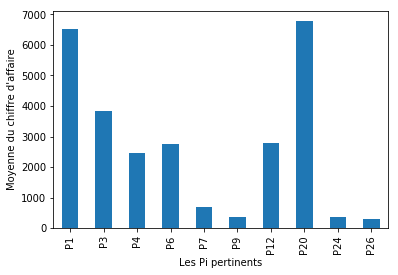

In [90]:
selectedP = ['P1', 'P3', 'P4', 'P6', 'P7', 'P9', 'P12', 'P20', 'P24', 'P26']
data = data[selectedP]
hist4 = data.mean().plot(kind='bar')
hist4.set_xlabel("Les Pi pertinents")
hist4.set_ylabel("Moyenne du chiffre d'affaire")


In [91]:
# Calcule de la moyenne des dépenses pour chaque client sur les Pi retenus
meanPurchasePower = data.T.mean()
print(meanPurchasePower)

0          29.479
1           4.122
2          95.276
3        1475.844
4         116.639
5        8945.175
6           6.788
7          78.214
8           6.474
9         150.338
10         19.475
11         98.373
12          5.910
13        631.664
14       4661.736
15         11.238
16        105.761
17       8091.802
18         35.426
19          5.915
20        792.387
21       2415.835
22       4067.768
23       1242.292
24        228.666
25       2183.159
26         90.153
27       2014.980
28         66.464
29        199.011
           ...   
11536     240.803
11537    1830.394
11538     703.925
11539    1568.446
11540    1508.176
11541      13.493
11542    1839.968
11543    7750.189
11544     482.867
11545      81.159
11546    2522.099
11547     219.315
11548      40.818
11549     132.188
11550    1067.959
11551    1278.295
11552     111.851
11553      91.627
11554     251.699
11555     237.974
11556    8096.080
11557     500.188
11558     802.241
11559     561.027
11560     

<strong>Regroupons ces individus en introduisants des seuils:</strong>
<ul>
    <li>Divers: 0 à 100 EUROS</li>
    <li>Particuliers: 100 à 500 EUROS</li>
    <li>Startups: 500 à 1000 EUROS</li>
    <li>PME: 1000 à 3000 EUROS</li>
    <li>Grande entreprise: 4000 à 6000 EUROS</li>
    <li>Entreprise de taille internationale: 6000+ EUROS</li>
</ul>

Text(0,0.5,'Nombres de clients')

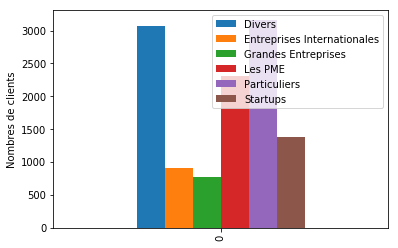

In [92]:
others_2 = meanPurchasePower.loc[meanPurchasePower < 100].count()
normalCustomers_2 = meanPurchasePower.loc[(meanPurchasePower < 500) & (meanPurchasePower > 100)].count()
startups_2 = meanPurchasePower.loc[(meanPurchasePower < 1000) & (meanPurchasePower > 500)].count()
pme_2 = meanPurchasePower.loc[(meanPurchasePower > 1000) & (meanPurchasePower < 4000)].count()
bigcompany_2 = meanPurchasePower.loc[(meanPurchasePower > 4000) & (meanPurchasePower < 8000)].count()
internationalcompany_2 = meanPurchasePower.loc[(meanPurchasePower > 8000)].count()

dictionary = {'Divers': [others_2], 'Particuliers': [normalCustomers_2], 'Startups': [startups_2], 'Les PME': [pme_2], 'Grandes Entreprises': [bigcompany_2], 'Entreprises Internationales': [internationalcompany_2]}

last_result = pandas.DataFrame(data=dictionary) 

hist5 = last_result.plot(kind='bar')
hist5.set_ylabel("Nombres de clients")

<p>Sur le diagramme de barre réalisé ci-dessous, on constate qu'on dégage bien 6 types de clientèles (comme on l'a vu sur l'hypothèse 1)</p>
<strong>Désormais, nous allons appliquer un des algorithmes de classification supervisés pour voir si on obient le même type de résultats.</strong>

# K - MEANS

<strong>Reprenons les données de départ (avec tous les Pi).</strong>
<p>Procédons dans un premier temps à faire une analyse en composants pricipales (ACP)</p>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

dataManager3 = DataManager("Alphaprise.xlsx", "apprentissage")
dataManager3.replaceColumnValue("PrevisionnelAnnuel", "[^0-9.e+]")
dataManager3.columnToNumeric("PrevisionnelAnnuel")
dataManager3.columnToNumeric("NbSalaries")

In [116]:
P = []
for i in range(1, 31): P.append('P'+str(i))
P_list = dataManager3.getDataframe()[P]
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(P_list) # retourne une liste contenant un ensemble de liste sans header
PCA_header = []
for i in range(1, 11): PCA_header.append('Principal Component'+str(i))
principalDf = pd.DataFrame(data = principalComponents, columns = PCA_header)
principalDf.head(5)
principalDf

,Principal Component1,Principal Component2,Principal Component3,Principal Component4,Principal Component5,Principal Component6,Principal Component7,Principal Component8,Principal Component9,Principal Component10
0,-9188.553430,-1243.591818,14613.017366,24502.107085,-2236.015972,-3084.056420,-639.067579,-374.576553,-753.844962,-157.661095
1,-9766.609169,-1309.919692,8583.488701,15633.542080,-2323.018293,-2702.278979,-729.828669,2176.001041,-2251.316929,18480.391923
2,-8502.534876,-384.484144,23140.278396,35233.187751,-3509.701421,-2963.678108,-1206.956008,-17.251135,-1025.026296,3432.883257
3,-6443.758042,-2186.570197,-2330.590044,-579.959264,556.044402,-2819.492272,1259.744643,232.684920,69.639320,603.809776
4,-10426.908557,-1549.846113,-4499.224946,508.635960,-1587.457962,-2815.924158,514.552036,-1571.988329,20.935471,102.585855
5,16011.469543,107771.446678,-16118.904831,405.334309,-4805.725799,-4256.820265,-1254.956184,-16760.459885,7695.465503,18238.055467
6,-10822.052173,-2817.370967,-4265.490322,457.677726,-1166.944088,-2857.993676,504.339308,-428.342831,-569.690146,-346.655035
7,-10479.439511,-2912.818499,-4344.077658,494.027477,-1531.674070,-2669.727600,800.915025,-340.105634,-481.522919,-314.943642
8,-10816.654755,-2835.178830,-4337.842544,493.026973,-1533.616129,-2796.977285,557.200557,-409.694176,-577.049478,-343.840962
9,-10531.817309,-2305.938152,-3599.528308,994.571432,-797.606117,-2934.365043,375.947414,-285.209753,-621.805408,633.068384
